In [1]:
#Import Dependencies
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

from sklearn.cluster import KMeans

from pathlib import Path

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

In [2]:
# Load CSV
crypto_csv = "crypto_data.csv"

crytpo_df= pd.read_csv(crypto_csv)

crytpo_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#Drop "isTrading"
crytpo_df2 = crytpo_df.drop('IsTrading', 1)

crytpo_df2.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [4]:
#Drop null values
crytpo_df3 = crytpo_df2.dropna(axis=0, how='any')

crytpo_df3.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [5]:
# Keep crypto's where TCM>0 
crytpo_df4 = crytpo_df3.loc[crytpo_df3['TotalCoinsMined'] > 0]

crytpo_df4.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [6]:
#remove categorical data
crytpo_df5 = crytpo_df4.drop(['Unnamed: 0', 'CoinName'], 1)

crytpo_df5.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [7]:
#Cast TCS 
crytpo_df5["TotalCoinSupply"] = pd.to_numeric(crytpo_df5["TotalCoinSupply"])

In [8]:
# Convert  to numeric 
crytpo_df6 = pd.get_dummies(crytpo_df5, drop_first=True)

crytpo_df6.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#standardize data

scaler = StandardScaler().fit(crytpo_df6)

crytpo_df7 = scaler.transform(crytpo_df6)

crytpo_df8 = pd.DataFrame(crytpo_df7, columns=crytpo_df6.columns)

crytpo_df8.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.114501,-0.150725,-0.041667,-0.041667,-0.058977,-0.093495,-0.041667,-0.058977,-0.058977,-0.041667,...,1.410545,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667
1,-0.090420,-0.142558,-0.041667,-0.041667,-0.058977,-0.093495,-0.041667,-0.058977,-0.058977,-0.041667,...,1.410545,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667
2,0.553699,4.671859,-0.041667,-0.041667,-0.058977,-0.093495,-0.041667,-0.058977,-0.058977,-0.041667,...,1.410545,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667
3,-0.114092,-0.150403,-0.041667,-0.041667,-0.058977,-0.093495,-0.041667,-0.058977,-0.058977,-0.041667,...,-0.708946,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667
4,-0.112043,-0.150725,-0.041667,-0.041667,-0.058977,-0.093495,-0.041667,-0.058977,-0.058977,-0.041667,...,-0.708946,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667


In [10]:
# Begin Dimensionality Reduction and creat crytpo_df9 

pca_model = PCA(n_components=0.9)

crypto_pca_model = pca_model.fit_transform(crytpo_df8)

crytpo_df9 = pd.DataFrame(data=crypto_pca_model)

crytpo_df9.head()


,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,-0.326612,1.150971,-0.507997,0.001282,-9.106874e-15,-1.005323e-11,-0.019931,-1.236770,-0.062490,-0.385601,...,3.042755e-15,1.349364e-15,-3.353759e-15,6.554798e-15,-2.125103e-15,-9.681457e-17,6.194559e-16,1.137976e-15,6.837870e-15,1.353914e-15
1,-0.309271,1.151202,-0.508395,0.001271,-8.999684e-15,-9.968805e-12,-0.020579,-1.240166,-0.066257,-0.381118,...,2.815484e-15,1.213717e-15,-3.396828e-15,6.732492e-15,-2.092322e-15,-2.280853e-16,6.359712e-16,1.063712e-15,6.870685e-15,1.579979e-15
2,2.419803,1.730762,-0.580012,0.004412,-5.119061e-14,-3.454900e-11,-0.071874,-1.582991,-0.733041,0.543650,...,-6.070151e-14,3.099066e-14,8.421365e-14,-3.049318e-14,-1.133154e-14,3.520104e-14,-4.833164e-14,1.519182e-14,-8.341618e-14,3.390286e-14
3,-0.139143,-1.352119,0.153305,-0.001143,3.174686e-15,8.945836e-12,0.004053,0.181693,0.227494,-0.171103,...,-2.203264e-15,4.580900e-15,8.046362e-15,1.037499e-15,-6.253513e-15,7.211185e-15,-8.310511e-15,4.658235e-15,-9.855267e-15,6.352149e-15
4,-0.136050,-2.118689,0.328052,-0.001617,4.081849e-15,1.266884e-11,0.037846,0.361939,0.195270,0.004130,...,1.321645e-13,-4.076640e-14,7.698739e-14,1.208985e-14,-4.674752e-14,7.861313e-14,-4.044844e-14,-2.197839e-14,-2.328816e-14,2.880674e-14


In [11]:
# Use t-SNE to synthesize data

crypto_tsne = TSNE(learning_rate=250)

crypto_tsne_features = crypto_tsne.fit_transform(crypto_pca_model)

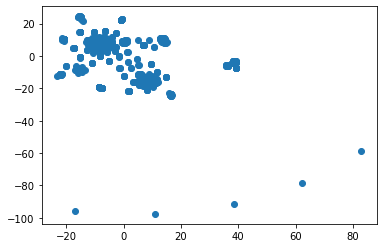

In [12]:
#vizualize data
plt.scatter(crypto_tsne_features[:,0], crypto_tsne_features[:,1])

plt.show()

In [13]:
# create new df holding crypto_tsne_features
crytpo_df10 = pd.DataFrame(data=crypto_tsne_features)
crytpo_df10.head()

,0,1
0,5.400942,-10.923540
1,11.695007,-14.706301
2,15.910707,-23.134817
3,39.312790,-3.558074
4,-15.272483,14.570316


C:\Users\taylo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


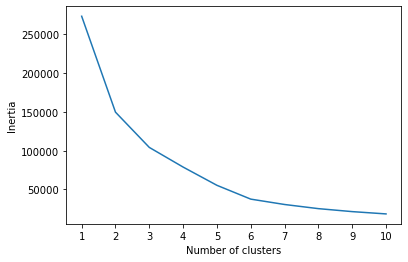

In [14]:
#Begin K Cluster 

inertia = []

k = list(range(1, 11))

for i in k:
    k_mean = KMeans(n_clusters=i, random_state=0)
    k_mean.fit(crytpo_df10)
    inertia.append(k_mean.inertia_)
   
elbow_curve_data= {"k": k, "inertia": inertia}
df_elbow_curve = pd.DataFrame(elbow_curve_data)

plt.plot(df_elbow_curve['k'], df_elbow_curve['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#best number of clusters is 3 based on the bow of the curve 

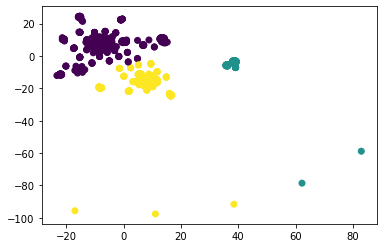

In [15]:
# Visaulize data with 3 clusters
final_model = KMeans(n_clusters=3, random_state=3)

final_model.fit(crytpo_df10)

cluster_predictions = final_model.predict(crytpo_df10)

plt.scatter(x=crytpo_df10[0], y=crytpo_df10[1],c=cluster_predictions)
plt.show()